# Exploratory Data Analysis of Amazon Prime Dataset

In [1]:
import seaborn as sns
import pandas as pd

## Basic information about our dataset

In [2]:
df = pd.read_csv('./data/amazon_prime_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [3]:
df.shape

(9668, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [5]:
# country_grp = df.groupby('country').size().reset_index()
# print ((country_grp))
# sns.set(rc = {'figure.figsize':(10,40)})
# ax = sns.barplot(x = country_grp[0], y = country_grp.country)
# ax.set(xlabel="Number of movies/ TV shows in total", ylabel="country")

## Data Analysis

### Categorizing whether the given show is either a movie or a TV Show

[Text(0.5, 0, 'Either movie or TV show'),
 Text(0, 0.5, 'Number of movies or TV shows')]

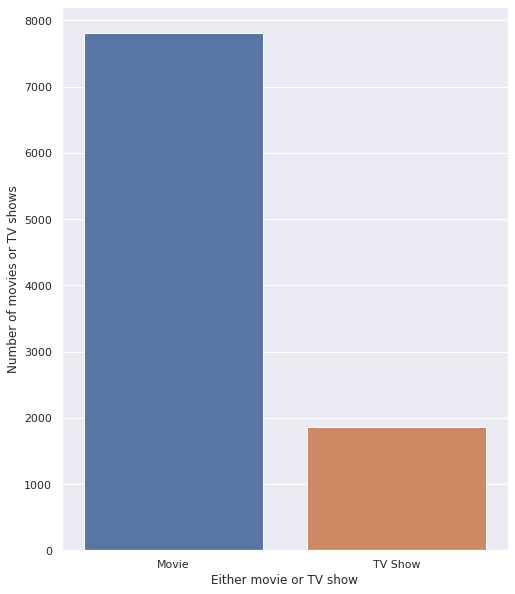

In [6]:
showtype = df['type'].value_counts().reset_index()
sns.set(rc = {'figure.figsize':(8,10)})
showtype.set_index('index', inplace=True)
ax = sns.barplot(x = showtype.index, y = showtype.type)
ax.set(xlabel = "Either movie or TV show", ylabel = "Number of movies or TV shows")

### Making a set of categories

#### Categories are mixed, hence the need to split each sentence and obtain individual categories

In [8]:
listset = set()
for item in df['listed_in']:
    templist = item.split(',')
    for x in templist:
        x = x.strip()
        listset.add(x)
print(listset)

{'Anime', 'Unscripted', 'Kids', 'Historical', 'Young Adult Audience', 'Animation', 'Adventure', 'Horror', 'Faith and Spirituality', 'and Culture', 'Comedy', 'Romance', 'Talk Show and Variety', 'Music Videos and Concerts', 'Western', 'Science Fiction', 'International', 'Military and War', 'Fitness', 'Special Interest', 'Entertainment', 'Drama', 'Sports', 'Arthouse', 'Suspense', 'LGBTQ', 'TV Shows', 'Documentary', 'Action', 'Arts', 'Fantasy'}


In [9]:
listset.remove('and Culture')
listset.add('Culture')
print(listset)

{'Anime', 'Unscripted', 'Kids', 'Historical', 'Culture', 'Young Adult Audience', 'Animation', 'Adventure', 'Horror', 'Faith and Spirituality', 'Comedy', 'Romance', 'Talk Show and Variety', 'Music Videos and Concerts', 'Western', 'Science Fiction', 'International', 'Military and War', 'Fitness', 'Special Interest', 'Entertainment', 'Drama', 'Sports', 'Arthouse', 'Suspense', 'LGBTQ', 'TV Shows', 'Documentary', 'Action', 'Arts', 'Fantasy'}


### Making a  dataframe with categories and the shows which belong to those categories

In [10]:
cat_dict = {}
for item in listset:
    cat_dict[item] = 0
for item in listset:
    for x in df['listed_in']:
        if item in x:
            cat_dict[item] += 1

ldf = pd.DataFrame(cat_dict.items())
ldf.columns = ['Category', 'Number of Shows']
ldf = ldf.sort_values(by='Number of Shows', ascending=False)
print(ldf)


                     Category  Number of Shows
21                      Drama             3687
10                     Comedy             2099
28                     Action             1657
24                   Suspense             1501
2                        Kids             1085
27                Documentary              993
19           Special Interest              980
8                      Horror              875
11                    Romance              674
6                   Animation              547
29                       Arts              483
4                     Culture              483
20              Entertainment              483
15            Science Fiction              457
16              International              355
26                   TV Shows              263
7                   Adventure              259
14                    Western              234
22                     Sports              160
13  Music Videos and Concerts              155
1            

#### Plotting the above data

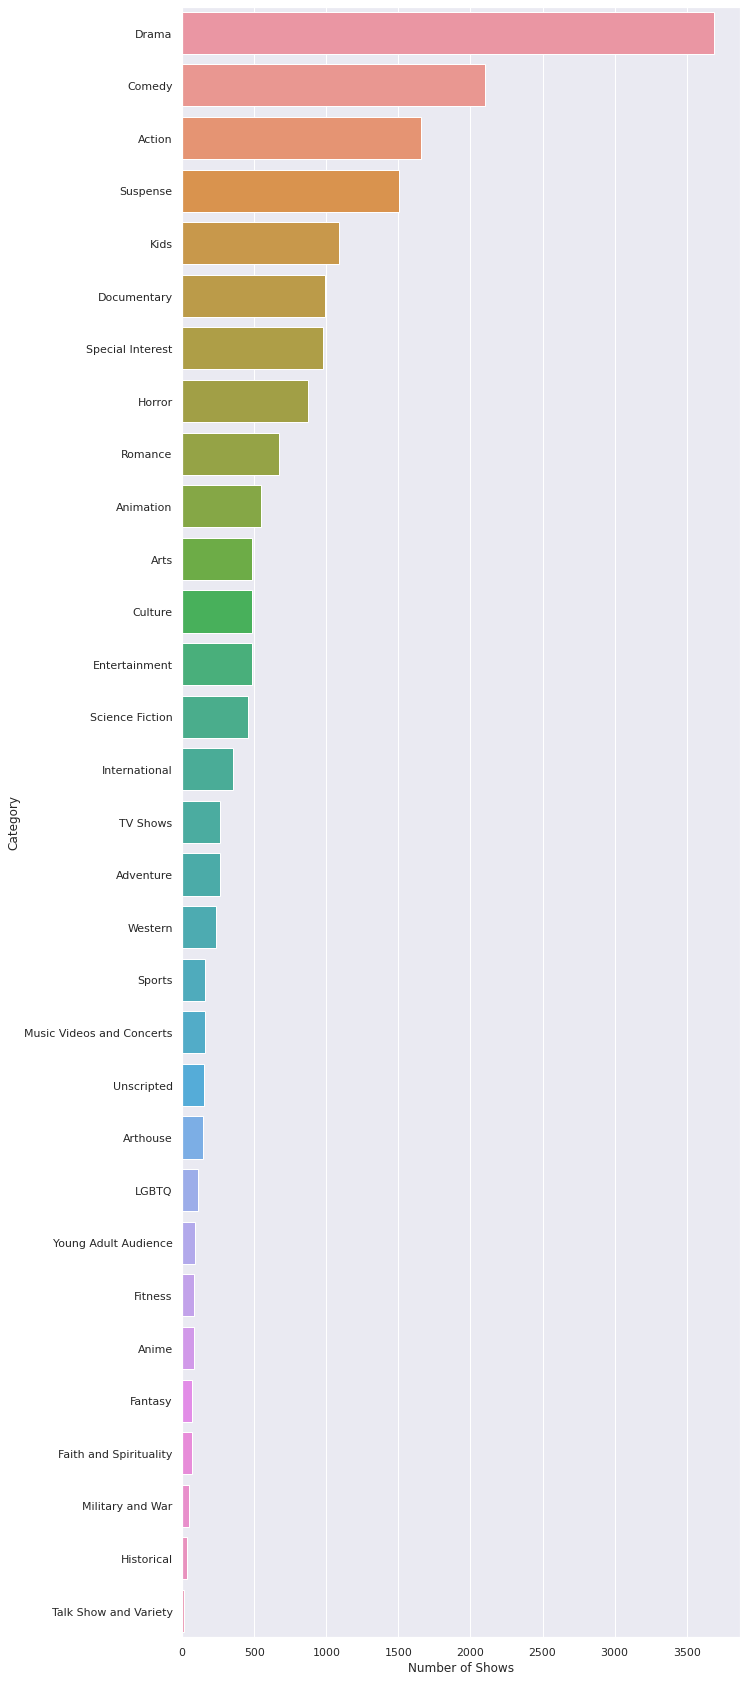

In [11]:
sns.set(rc = {'figure.figsize':(10,30)})
ax = sns.barplot(x=ldf['Number of Shows'], y=ldf['Category'])

### Categoring shows on the basis of their country of origin

#### As for reasons stated above, individual countries need to be split from each string

In [12]:
countryset = set()
for item in df['country']:
    if (isinstance(item, str)):
        item = item.split(',')
        for x in item:
            x = x.strip()
            countryset.add(x)
print(countryset)


{'Hungary', 'Australia', 'Malaysia', 'Egypt', 'United States', 'Iran', 'France', 'Luxembourg', 'Kosovo', 'Germany', 'Belgium', 'Mexico', 'Austria', 'Switzerland', 'Ireland', 'United Arab Emirates', 'China', 'Afghanistan', 'Canada', 'Italy', 'India', 'Albania', 'Argentina', 'Georgia', 'Chile', 'Japan', 'Brazil', 'Monaco', 'Spain', 'Singapore', 'Norway', 'Netherlands', 'Denmark', 'United Kingdom', 'Czech Republic', 'Kazakhstan', 'New Zealand', 'South Africa', 'Colombia', 'Sweden', 'Poland', 'Thailand', 'Portugal', 'Hong Kong', 'South Korea'}


#### Making a dataframe with the above mentioned countries and listing shows accordingly

In [13]:
country_dict = {}
for item in countryset:
    country_dict[item] = 0
for item in countryset:
    for x in df['country']:
        if type(x) == str:
            if item in x:
                country_dict[item] += 1

cdf = pd.DataFrame(country_dict.items())
cdf.columns = ['Country', 'Number of Shows']
cdf = cdf.sort_values(by='Number of Shows', ascending=False)
cdf

,Country,Number of Shows
4,United States,334
20,India,246
33,United Kingdom,67
18,Canada,35
6,France,20
9,Germany,17
19,Italy,14
28,Spain,11
32,Denmark,6
16,China,6


#### Plotting the above data

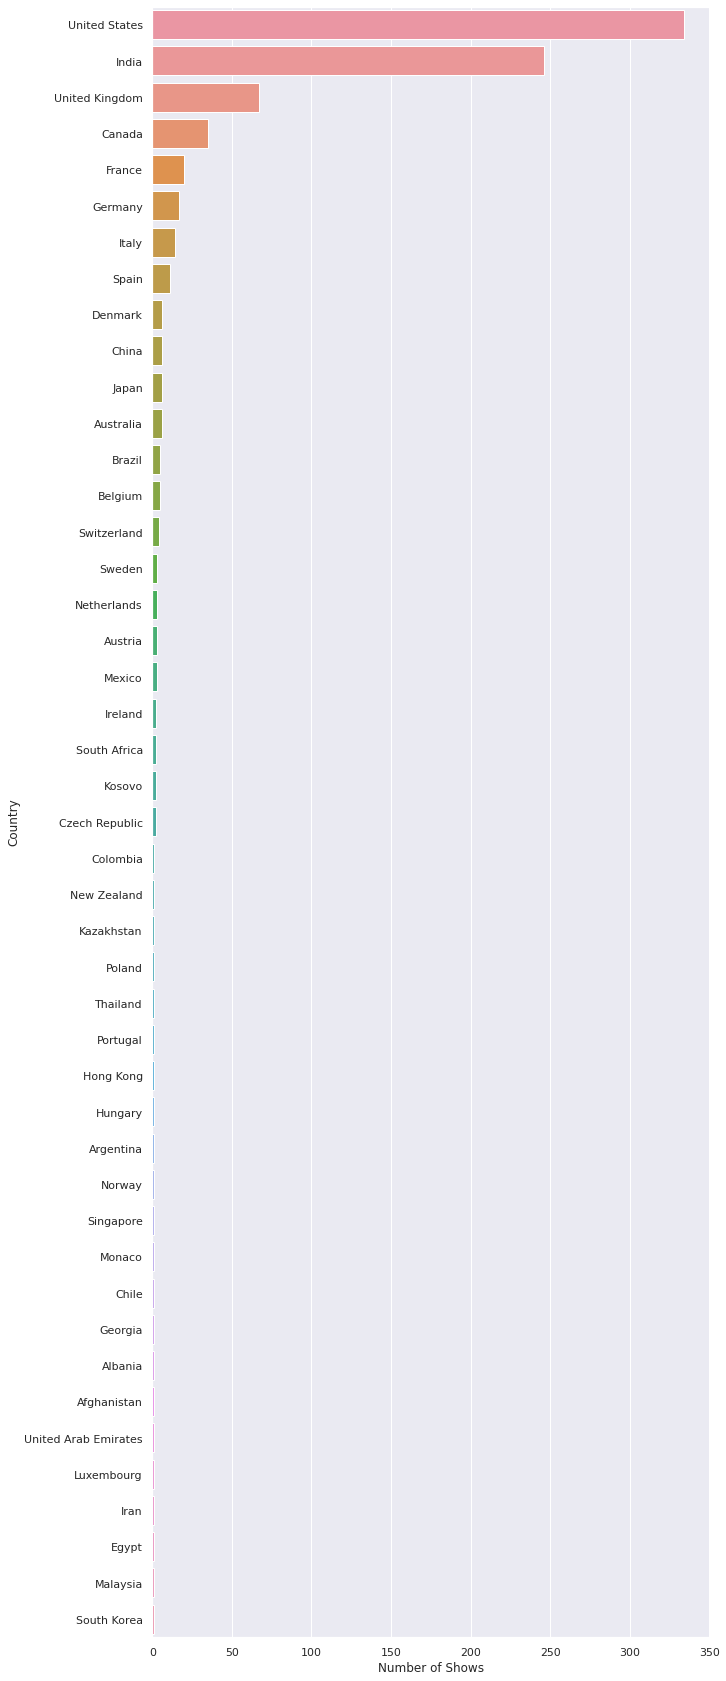

In [14]:
sns.set(rc = {'figure.figsize':(10,30)})
ax = sns.barplot(x=cdf['Number of Shows'], y=cdf['Country'])

### Categorizing shows based on their release year

In [15]:
modern_movies = 0
movies_90s = 0
movies_80s = 0
old_movies = 0
very_old_movies = 0

for year in df['release_year']:
    if (year >= 2000):
        modern_movies += 1
    elif (year >= 1990):
        movies_90s += 1
    elif (year >= 1980):
        movies_80s += 1
    elif (year >= 1960):
        old_movies += 1
    else:
        very_old_movies += 1
# print("Modern movies: ", modern_movies)
# print("Old movies: ", old_movies)
# print("Very old movies: ", very_old_movies)
data = [['Older than 1960', very_old_movies],
['60s to 80s', old_movies],
['80s', movies_80s],
['90s', movies_90s],
['After 2000', modern_movies]
]
mdf = pd.DataFrame(data, columns=['Movie period', 'Number of Movies'])
mdf

,Movie period,Number of Movies
0,Older than 1960,487
1,60s to 80s,333
2,80s,299
3,90s,577
4,After 2000,7972


#### Categorical representation

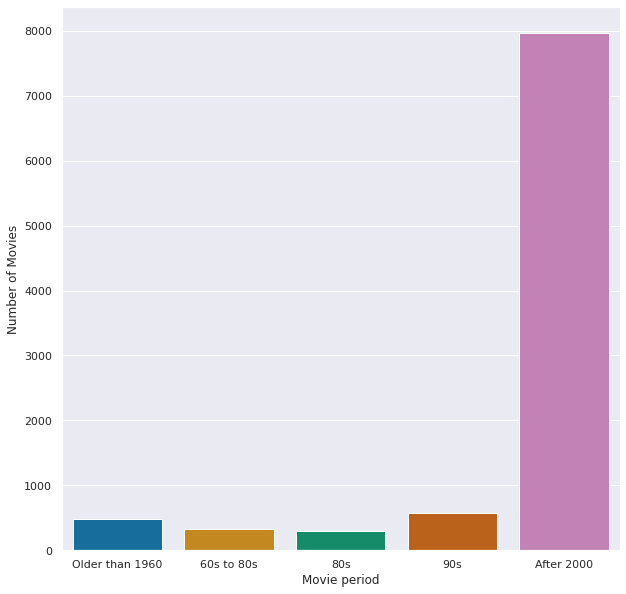

In [20]:
sns.set(rc = {'figure.figsize':(10,10)})
custom_palette = sns.color_palette("colorblind")
sns.set_palette(custom_palette)
ax = sns.barplot(x = mdf['Movie period'], y = mdf['Number of Movies'])

#### Representation using a histogram

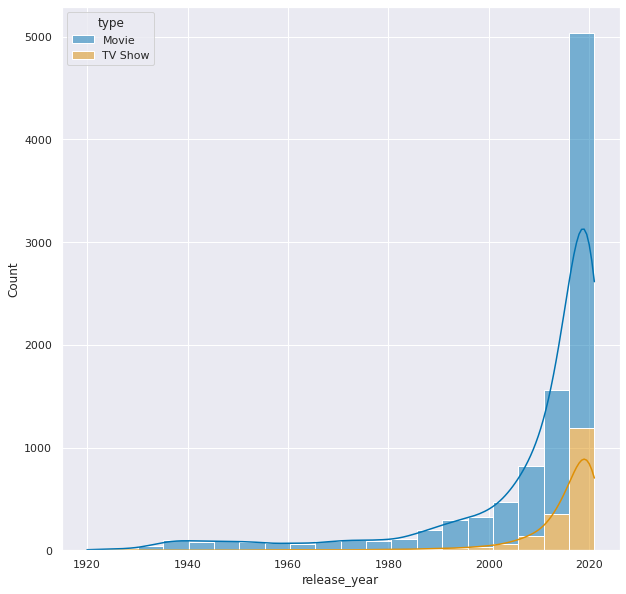

In [17]:
m2df = df['release_year'].reset_index()
sns.set(rc = {'figure.figsize':(10,10)})
custom_palette = sns.color_palette("colorblind")
sns.set_palette(custom_palette)
ax = sns.histplot(data=m2df, x='release_year', kde=True, bins=20, hue=df['type'], multiple='stack')

### Deriving subgenres/subcategories from description of the movie/show

In [18]:
sports_count = 0
crime_count = 0
cooking_count = 0
spmatches = ['golf', 'baseball', 'volleyball', 'tennis', 'swimming', 'rugby', 'hockey', 'basketball', 'soccer', 'cricket', 'badminton', 'football']
crmatches = ['killer', 'serial killer', 'murder', 'psycho', 'stabbing']
comatches = ['vegetable', 'fruit', 'meat', 'chicken', 'beef', 'pork', 'pasta', 'noodle']

for item in df['description']:
    if any(x in item for x in spmatches):
        sports_count += 1
    if any(x in item for x in crmatches):
        crime_count += 1
    if any(x in item for x in comatches):
        cooking_count += 1
print(sports_count)
print(crime_count)
print(cooking_count)
sbdict = {'Sports':sports_count, 'Crime':crime_count, 'Cooking':cooking_count}
sbdf = pd.DataFrame(sbdict.items())
sbdf.columns = ['Derived Categories', 'Number of Shows']
sbdf

137
731
31


,Derived Categories,Number of Shows
0,Sports,137
1,Crime,731
2,Cooking,31


#### Plotting the above data

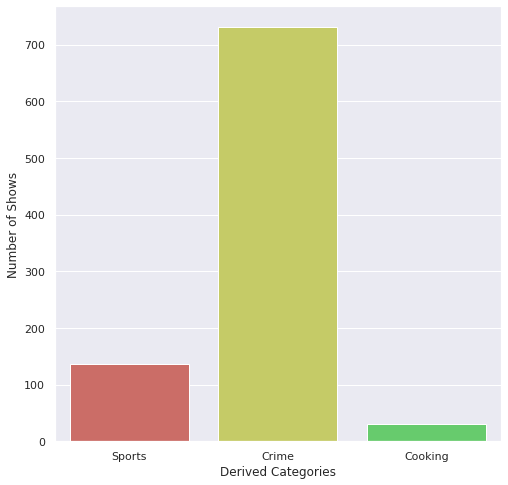

In [19]:
sns.set(rc = {'figure.figsize':(8,8)})
custom_palette = sns.color_palette("hls",6)
sns.set_palette(custom_palette)
ax = sns.barplot(x=sbdf['Derived Categories'], y=sbdf['Number of Shows'])